# Big Picture

In [0]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

Headers: 
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10000
- PTRATIO  pupil/teacher ratio by town

- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [0]:
import pandas as pd # Pandas module to enable data manipulation
housing = pd.read_csv("housing.csv", sep="\s+", names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"])

In [88]:
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [90]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Saving figure attribute_histogram_plots


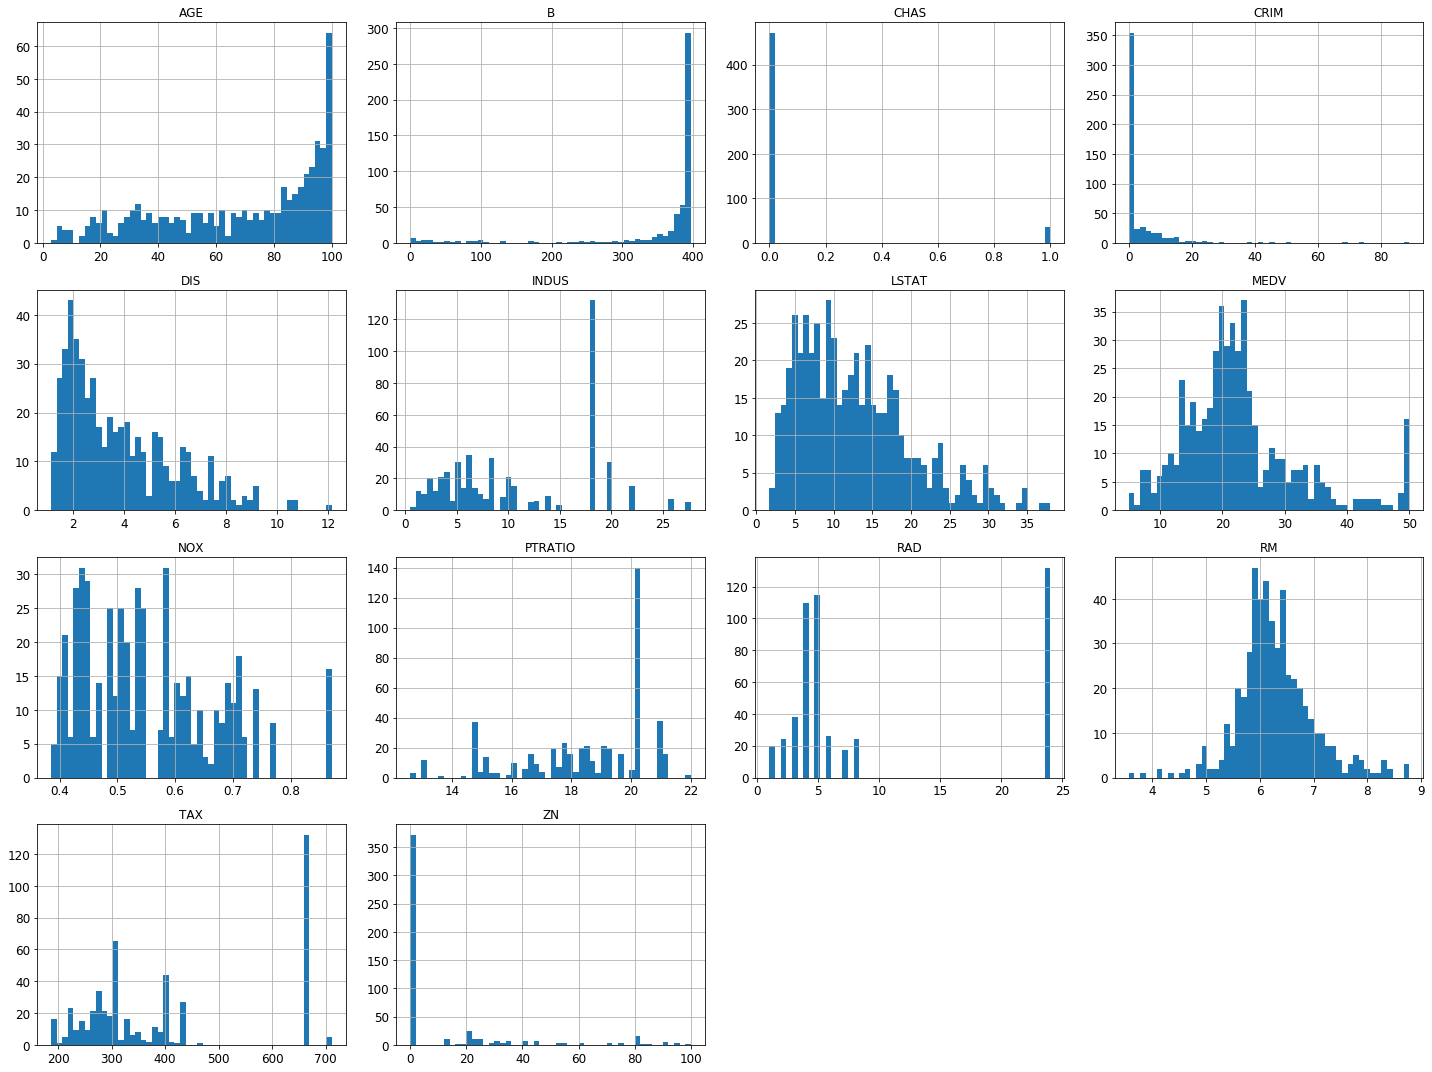

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Since this data set is so small, it is better to do stratified sampling. The stratification will be based on MEDV, the median housing value, since that is what we are trying to predict.

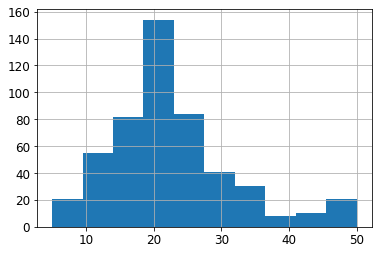

In [92]:
housing["MEDV"].hist()

To break this data up better, split the bins with an upper bound at 500, 

In [0]:
housing["value_cat"] = pd.cut(housing["MEDV"], 
                               bins = [0, 10, 20, 30, 40, np.inf],
                               labels = [1, 2, 3, 4, 5])

In [94]:
housing["value_cat"].value_counts()

3    207
2    191
4     53
5     31
1     24
Name: value_cat, dtype: int64

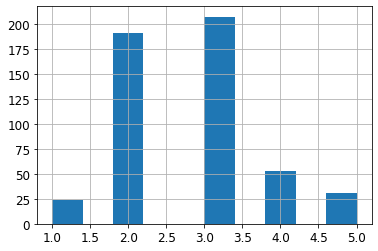

In [95]:
housing["value_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["value_cat"]): #value_cat
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [97]:
strat_test_set["value_cat"].value_counts() / len(strat_test_set)

3    0.411765
2    0.372549
4    0.107843
5    0.058824
1    0.049020
Name: value_cat, dtype: float64

In [98]:
housing["value_cat"].value_counts() / len(housing)

3    0.409091
2    0.377470
4    0.104743
5    0.061265
1    0.047431
Name: value_cat, dtype: float64

# Discover and Visualize

In [0]:
housing = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe51a4cfeb8>,
      dtype=object)

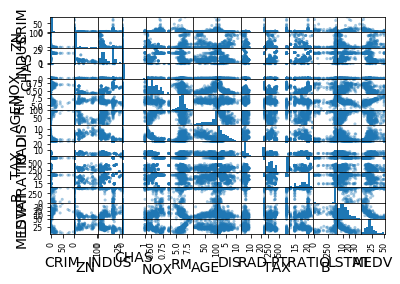

In [100]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, alpha=0.4)

In [101]:
corr_matrix = housing.corr()
corr_matrix["CRIM"].sort_values(ascending=False)

CRIM       1.000000
RAD        0.611260
TAX        0.567792
LSTAT      0.469413
NOX        0.418278
INDUS      0.407701
AGE        0.355102
PTRATIO    0.288743
CHAS      -0.047228
ZN        -0.203789
RM        -0.226962
B         -0.339335
DIS       -0.374443
MEDV      -0.391283
Name: CRIM, dtype: float64

In [102]:
corr_matrix["ZN"].sort_values(ascending=False)

ZN         1.000000
DIS        0.661535
MEDV       0.375967
RM         0.329177
B          0.180656
CHAS      -0.020796
CRIM      -0.203789
RAD       -0.323787
TAX       -0.335576
PTRATIO   -0.374879
LSTAT     -0.415362
NOX       -0.511900
INDUS     -0.535234
AGE       -0.552113
Name: ZN, dtype: float64

In [103]:
corr_matrix["INDUS"].sort_values(ascending=False)

INDUS      1.000000
NOX        0.765763
TAX        0.744235
AGE        0.640691
LSTAT      0.613097
RAD        0.607606
CRIM       0.407701
PTRATIO    0.378730
CHAS       0.055940
B         -0.361714
RM        -0.427184
MEDV      -0.499120
ZN        -0.535234
DIS       -0.704890
Name: INDUS, dtype: float64

In [104]:
corr_matrix["CHAS"].sort_values(ascending=False)

CHAS       1.000000
MEDV       0.183854
NOX        0.096629
AGE        0.090400
RM         0.057491
INDUS      0.055940
B          0.040382
RAD       -0.011600
ZN        -0.020796
TAX       -0.033542
CRIM      -0.047228
LSTAT     -0.051001
DIS       -0.099892
PTRATIO   -0.130689
Name: CHAS, dtype: float64

In [105]:
corr_matrix["NOX"].sort_values(ascending=False)

NOX        1.000000
INDUS      0.765763
AGE        0.740609
TAX        0.670252
RAD        0.611198
LSTAT      0.595718
CRIM       0.418278
PTRATIO    0.163190
CHAS       0.096629
RM        -0.336038
B         -0.377758
MEDV      -0.438384
ZN        -0.511900
DIS       -0.767043
Name: NOX, dtype: float64

In [106]:
corr_matrix["RM"].sort_values(ascending=False)

RM         1.000000
MEDV       0.679439
ZN         0.329177
DIS        0.242276
B          0.128249
CHAS       0.057491
CRIM      -0.226962
RAD       -0.241231
AGE       -0.264507
TAX       -0.327459
NOX       -0.336038
PTRATIO   -0.344911
INDUS     -0.427184
LSTAT     -0.609371
Name: RM, dtype: float64

In [107]:
corr_matrix["AGE"].sort_values(ascending=False)

AGE        1.000000
NOX        0.740609
INDUS      0.640691
LSTAT      0.613834
TAX        0.544165
RAD        0.485193
CRIM       0.355102
PTRATIO    0.244342
CHAS       0.090400
B         -0.262921
RM        -0.264507
MEDV      -0.390075
ZN        -0.552113
DIS       -0.745570
Name: AGE, dtype: float64

In [108]:
corr_matrix["DIS"].sort_values(ascending=False)

DIS        1.000000
ZN         0.661535
B          0.287711
MEDV       0.266088
RM         0.242276
CHAS      -0.099892
PTRATIO   -0.216285
CRIM      -0.374443
RAD       -0.501769
LSTAT     -0.502064
TAX       -0.547909
INDUS     -0.704890
AGE       -0.745570
NOX       -0.767043
Name: DIS, dtype: float64

In [109]:
corr_matrix["RAD"].sort_values(ascending=False)

RAD        1.000000
TAX        0.904387
CRIM       0.611260
NOX        0.611198
INDUS      0.607606
LSTAT      0.507866
AGE        0.485193
PTRATIO    0.482028
CHAS      -0.011600
RM        -0.241231
ZN        -0.323787
MEDV      -0.381903
B         -0.424323
DIS       -0.501769
Name: RAD, dtype: float64

In [110]:
corr_matrix["TAX"].sort_values(ascending=False)

TAX        1.000000
RAD        0.904387
INDUS      0.744235
NOX        0.670252
LSTAT      0.568393
CRIM       0.567792
AGE        0.544165
PTRATIO    0.476530
CHAS      -0.033542
RM        -0.327459
ZN        -0.335576
B         -0.425326
MEDV      -0.477005
DIS       -0.547909
Name: TAX, dtype: float64

In [111]:
corr_matrix["PTRATIO"].sort_values(ascending=False)

PTRATIO    1.000000
RAD        0.482028
TAX        0.476530
INDUS      0.378730
LSTAT      0.357345
CRIM       0.288743
AGE        0.244342
NOX        0.163190
CHAS      -0.130689
B         -0.157617
DIS       -0.216285
RM        -0.344911
ZN        -0.374879
MEDV      -0.483569
Name: PTRATIO, dtype: float64

In [112]:
corr_matrix["B"].sort_values(ascending=False)

B          1.000000
MEDV       0.324998
DIS        0.287711
ZN         0.180656
RM         0.128249
CHAS       0.040382
PTRATIO   -0.157617
AGE       -0.262921
CRIM      -0.339335
INDUS     -0.361714
LSTAT     -0.362848
NOX       -0.377758
RAD       -0.424323
TAX       -0.425326
Name: B, dtype: float64

In [113]:
corr_matrix["LSTAT"].sort_values(ascending=False)

LSTAT      1.000000
AGE        0.613834
INDUS      0.613097
NOX        0.595718
TAX        0.568393
RAD        0.507866
CRIM       0.469413
PTRATIO    0.357345
CHAS      -0.051001
B         -0.362848
ZN        -0.415362
DIS       -0.502064
RM        -0.609371
MEDV      -0.734822
Name: LSTAT, dtype: float64

In [114]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679439
ZN         0.375967
B          0.324998
DIS        0.266088
CHAS       0.183854
RAD       -0.381903
AGE       -0.390075
CRIM      -0.391283
NOX       -0.438384
TAX       -0.477005
PTRATIO   -0.483569
INDUS     -0.499120
LSTAT     -0.734822
Name: MEDV, dtype: float64

Take the correlation values that are above 0.65 and visualize them.

No handles with labels found to put in legend.


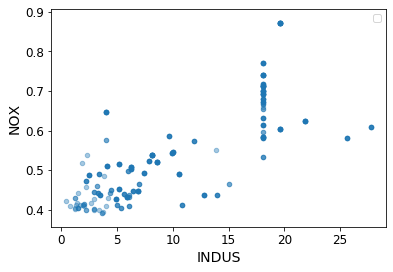

In [115]:
housing.plot(kind="scatter", x="INDUS", y="NOX", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


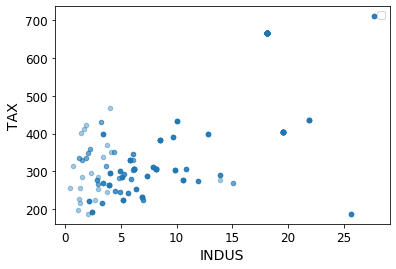

In [116]:
housing.plot(kind="scatter", x="INDUS", y="TAX", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


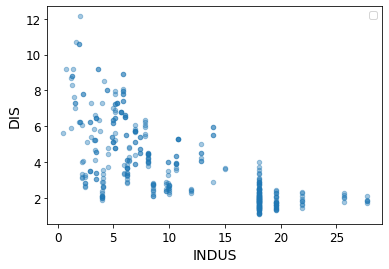

In [117]:
housing.plot(kind="scatter", x="INDUS", y="DIS", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


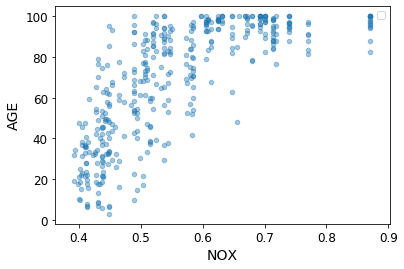

In [118]:
housing.plot(kind="scatter", x="NOX", y="AGE", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


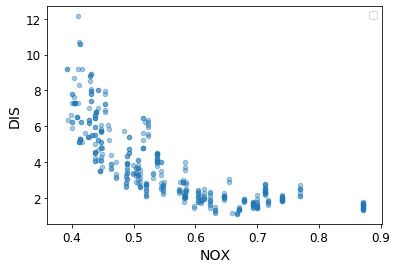

In [119]:
housing.plot(kind="scatter", x="NOX", y="DIS", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


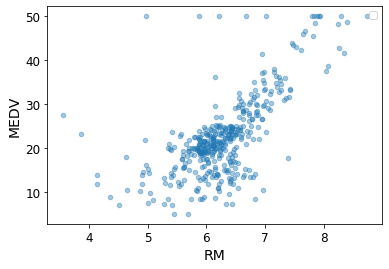

In [120]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


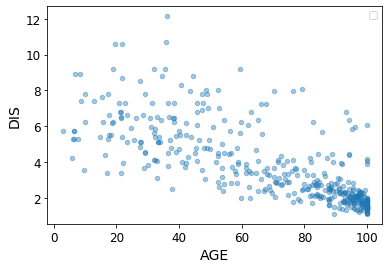

In [121]:
housing.plot(kind="scatter", x="AGE", y="DIS", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


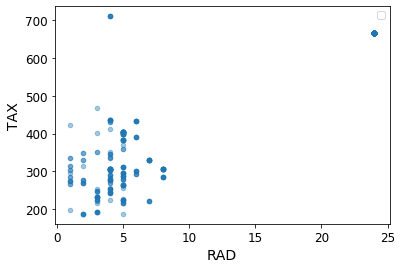

In [122]:
housing.plot(kind="scatter", x="RAD", y="TAX", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


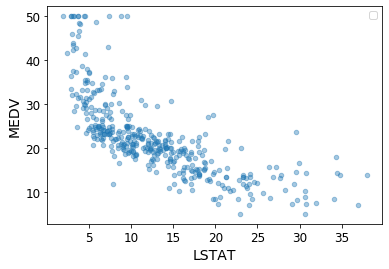

In [123]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.4,
    #c="INDUS", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Looking at these graphs, I came to the conclusion that INDUS v DIS, NOX v DIS, RM v MEDV, and LSTAT v MEDV all had what seemed to be strong graphical relations, while INDUS v TAX, NOX v AGE, and AGE v DIS had mild graphical relations.

No handles with labels found to put in legend.


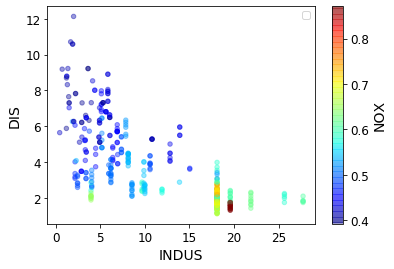

In [124]:
housing.plot(kind="scatter", x="INDUS", y="DIS", alpha=0.4,
    c="NOX", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


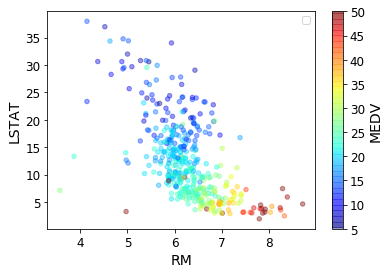

In [125]:
housing.plot(kind="scatter", x="RM", y="LSTAT", alpha=0.4,
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

I think this is a good relationship to potentially explore, so I will initally work with this.

Create a feature: Cost/Room

In [0]:
housing["Cost/Room"] = housing["MEDV"]/housing["RM"]

In [0]:
corr_matrix = housing.corr()

In [128]:
corr_matrix["Cost/Room"].sort_values(ascending=False)

Cost/Room    1.000000
MEDV         0.944504
RM           0.427287
B            0.338558
ZN           0.322657
DIS          0.240735
CHAS         0.192600
RAD         -0.363913
AGE         -0.379968
CRIM        -0.405555
NOX         -0.412256
PTRATIO     -0.430723
INDUS       -0.444454
TAX         -0.449303
LSTAT       -0.689899
Name: Cost/Room, dtype: float64

No handles with labels found to put in legend.


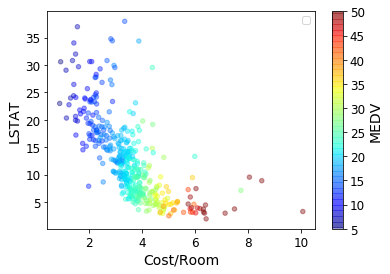

In [129]:
housing.plot(kind="scatter", x="Cost/Room", y="LSTAT", alpha=0.4,
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

# Data Preparation

No missing values based on count seen earlier, so no need to handle this.

No need to handle categorical data, since the category is already binary.

In [0]:
housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

Finally, Standardize the Data for easier ML Algorithm interpretation

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

housing_tr = num_pipeline.fit_transform(housing)

In [132]:
housing_tr

array([[ 0.00317313, -0.4961644 ,  1.01589772, ...,  0.26079071,
        -0.34313793,  0.26451023],
       [-0.40909811, -0.4961644 , -0.75158412, ...,  0.22571354,
        -0.174649  , -0.81490526],
       [-0.39256595, -0.4961644 , -0.54484407, ...,  0.43574218,
         0.01593685,  0.26451023],
       ...,
       [-0.40521462, -0.4961644 , -0.373046  , ...,  0.33572337,
         0.19547424,  0.26451023],
       [-0.41386698, -0.4961644 , -1.26115467, ...,  0.38937081,
        -1.13586456,  2.42334122],
       [-0.01331528, -0.4961644 ,  1.23137326, ..., -2.91874325,
         0.32391253, -0.81490526]])

In [133]:
housing_tr.shape

(404, 14)

# Find and Train a Model

In [134]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

some_data_prepared = num_pipeline.fit_transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [23.05289519 15.23297269 23.62754967 37.03413597 13.52150588]


In [136]:
print("Labels:", list(some_labels))

Labels: [20.8, 20.0, 22.2, 32.2, 18.9]


Note that these values are in thousands of USD, so these estimates are much further off than initally appear.

In [137]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.7828883341019246

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_tr, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [139]:
housing_predictions = tree_reg.predict(housing_tr)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This indicates overfitting, so instead check error with a 5-fold cross-validation.

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_tr, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

The scores for the DecisionTree

In [141]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.82860171 2.59964385 2.6117257  2.70885607 3.01008721]
Mean: 2.751782908563274
Standard deviation: 0.15311908362015914


The scores for the Linear Regression

In [142]:
lin_scores = cross_val_score(lin_reg, housing_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.59731562 2.83729063 2.73927013 3.05821222 2.80805086 3.01182335
 3.65662846 2.96702085 2.71283419 3.08625658]
Mean: 2.9474702871452827
Standard deviation: 0.2813434374696381


Moving on to the final model used in the example, I will try a RandomForestRegressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [144]:
housing_predictions = forest_reg.predict(housing_tr)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.783063803781071

This is significantly better than the previous two models, cutting the error down by about 66%. However, to check for overfitting, run the model with a 5-fold cross-validation.

In [145]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_tr, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.12121905 2.06535579 2.17936449 2.14747388 2.01329229]
Mean: 2.105341100926151
Standard deviation: 0.05929342382666834


This is still the best result of the models tested, however it can probably still be improved upon.

# Model Fine Tuning

First, try a Grid Search to see if satisfactory results are achieved:

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of ? rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_tr, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [147]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [148]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [149]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.5472186306622575 {'max_features': 2, 'n_estimators': 3}
3.3257629478339528 {'max_features': 2, 'n_estimators': 10}
2.763437920960794 {'max_features': 2, 'n_estimators': 30}
2.6382097371672235 {'max_features': 4, 'n_estimators': 3}
2.602888915568646 {'max_features': 4, 'n_estimators': 10}
2.2563914070382007 {'max_features': 4, 'n_estimators': 30}
2.440675693226401 {'max_features': 6, 'n_estimators': 3}
2.350804818186715 {'max_features': 6, 'n_estimators': 10}
2.1798646645517508 {'max_features': 6, 'n_estimators': 30}
2.439296163862497 {'max_features': 8, 'n_estimators': 3}
2.2153624790494777 {'max_features': 8, 'n_estimators': 10}
2.1259510768450305 {'max_features': 8, 'n_estimators': 30}
3.0780514541602715 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.704972293393167 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.8882760508568706 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.6375631851304635 {'bootstrap': False, 'max_features': 3, 'n_estim

In [150]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006778,0.002000,0.000988,0.000138,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-11.212593,-11.511811,-10.652606,-15.877874,-13.658917,-12.582760,1.937301,18,-3.746505e+00,-5.983216e+00,-3.367595e+00,-3.191510e+00,-3.447521e+00,-3.947270e+00,1.033666e+00
1,0.016706,0.000590,0.001580,0.000169,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9.326327,-8.338384,-9.086728,-15.371986,-13.180070,-11.060699,2.734759,17,-2.258375e+00,-2.493780e+00,-2.299013e+00,-2.443998e+00,-2.292991e+00,-2.357632e+00,9.323317e-02
2,0.047188,0.000785,0.002900,0.000296,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-6.363356,-6.440681,-5.820700,-10.797339,-8.760870,-7.636589,1.876333,14,-1.367837e+00,-1.532055e+00,-1.017932e+00,-1.248329e+00,-1.184293e+00,-1.270089e+00,1.729730e-01
3,0.006582,0.000210,0.001034,0.000022,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-7.634102,-5.257380,-6.585254,-8.799684,-6.524333,-6.960151,1.188950,11,-2.707984e+00,-1.936295e+00,-1.749835e+00,-2.481121e+00,-2.302589e+00,-2.235565e+00,3.502760e-01
4,0.018927,0.000367,0.001542,0.000112,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-5.219323,-4.643677,-6.107017,-10.288200,-7.616936,-6.775031,2.022884,9,-1.605364e+00,-1.351176e+00,-1.156068e+00,-1.373136e+00,-1.581313e+00,-1.413411e+00,1.653829e-01
5,0.051431,0.001535,0.003027,0.000396,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-4.155515,-4.107029,-4.979801,-6.800737,-5.413428,-5.091302,0.988216,4,-1.019182e+00,-8.336145e-01,-8.043818e-01,-7.385352e-01,-8.802225e-01,-8.551873e-01,9.399516e-02
6,0.006664,0.000277,0.001019,0.000115,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-6.104335,-6.239053,-6.879259,-5.771550,-4.790292,-5.956898,0.685190,8,-1.469463e+00,-2.115263e+00,-1.842993e+00,-1.178958e+00,-1.914451e+00,-1.704226e+00,3.356852e-01
7,0.020905,0.000524,0.001645,0.000158,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-4.167183,-4.592840,-5.438178,-7.585683,-5.847534,-5.526283,1.189165,6,-1.164298e+00,-1.001134e+00,-9.544975e-01,-1.193721e+00,-1.622229e+00,-1.187176e+00,2.360457e-01
8,0.060886,0.000719,0.003150,0.000294,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-4.366605,-3.938221,-4.775997,-5.276139,-5.402088,-4.751810,0.549304,2,-7.898795e-01,-7.851282e-01,-6.434943e-01,-6.539155e-01,-8.769694e-01,-7.498774e-01,8.890581e-02
9,0.007545,0.000070,0.001110,0.000120,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-6.146488,-5.781440,-8.235720,-5.255597,-4.331583,-5.950166,1.295608,7,-2.224775e+00,-2.028882e+00,-2.031410e+00,-1.371304e+00,-1.730161e+00,-1.877306e+00,2.983782e-01


Then, because I would like to attempt to get the training error closer to 2, I'm going to run a RandomizedSearchCV.

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_tr, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [152]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.0646635261129584 {'max_features': 7, 'n_estimators': 180}
2.033140167694562 {'max_features': 8, 'n_estimators': 189}
2.172501177349029 {'max_features': 5, 'n_estimators': 103}
2.3972832070522694 {'max_features': 3, 'n_estimators': 75}
2.060878613444181 {'max_features': 8, 'n_estimators': 117}
2.245899019750575 {'max_features': 4, 'n_estimators': 104}
2.0468211466968524 {'max_features': 8, 'n_estimators': 131}
2.130450861604839 {'max_features': 6, 'n_estimators': 53}
2.676386393872529 {'max_features': 2, 'n_estimators': 88}
2.1130650212873325 {'max_features': 6, 'n_estimators': 130}


In [153]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.02562856, 0.00078237, 0.00733848, 0.00065152, 0.02219604,
       0.12996564, 0.00516813, 0.02046665, 0.00345163, 0.0043703 ,
       0.0098895 , 0.00524976, 0.25869726, 0.50614417])

Based on this feature importance array, we can tell that RM and LSTAT matter a significant amount, and CRIM, NOX, and DIS all matter to a certain extent, but not nearly as much as RM and LSTAT.

## Running on Test Data

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_test_prepared = num_pipeline.fit_transform(X_test)

#X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [155]:
final_rmse

2.2726176446128514